In [1]:
import pandas as pd

In [36]:
import seaborn as sns

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-serebrjakov/shared/lesson_3_data.csv',
                 encoding = 'windows-1251')

In [3]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [4]:
user_df = df[['tc', 'art_sp']]

In [5]:
user_df.head()

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [6]:
user_df = user_df.rename(columns = {'tc' : 'user_id', 'art_sp' : 'brand_info'})

In [7]:
user_df

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [8]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

In [9]:
brand_name = 'MARAVILLA 500 G Store_Brand'

In [10]:
brand_name.split(' ')[3]

'Store_Brand'

In [11]:
brand_name.split(' ')[-1]

'Store_Brand'

In [12]:
split_brand('MARAVILLA 500 G Store_Brand')

'Store_Brand'

In [13]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

In [14]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [15]:
user_df.brand_info.apply(lambda x: x.split(' ')[-1])

0        Store_Brand
1        Store_Brand
2            Brand_1
3            Brand_7
4            Brand_2
            ...     
48124        Brand_4
48125        Brand_4
48126    Store_Brand
48127    Store_Brand
48128    Store_Brand
Name: brand_info, Length: 48129, dtype: object

In [18]:
users_unique_brands.user_id.nunique()

11764

In [19]:
users_unique_brands['user_id']

0       -1236394515
1              1031
2              4241
3             17311
4             17312
            ...    
11759    1408817589
11760    1408825059
11761    1408832719
11762    1408840919
11763    1408849249
Name: user_id, Length: 11764, dtype: int64

In [20]:
users_purchases

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5
...,...,...
11740,1408767189,5
11750,1408783189,10
11751,1408783379,6
11754,1408798879,8


In [21]:
users_purchases.purchases.median()

7.0

In [22]:
users_purchases.describe()

,user_id,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [16]:
users_purchases = user_df.groupby('user_id', as_index = False) \
            .agg({'brand_name' : 'count'}) \
            .rename(columns = {'brand_name' : 'purchases'}) \
            .query('purchases >= 5')

In [17]:
users_unique_brands = user_df.groupby('user_id', as_index = False) \
    .agg({'brand_name' : pd.Series.nunique}) \
    .rename(columns = {'brand_name' : 'unique_brands'})

In [48]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index = False) \
    .agg({'brand_info' : 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending = [False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns = {'brand_name' : 'lovely_brand', 'brand_info' : 'lovely_brand_purchases'})

In [26]:
users_purchases \
    .merge(users_unique_brands, on = 'user_id', how = 'outer') \
    .merge(lovely_brand_purchases_df, on = 'user_id', how = 'outer')

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6.0,2,Store_Brand,5
1,4241,5.0,2,Brand_4,3
2,25971,7.0,2,Store_Brand,5
3,40911,27.0,5,Brand_4,19
4,45181,5.0,4,Store_Brand,2
...,...,...,...,...,...
11759,1408817589,NaN,2,Store_Brand,2
11760,1408825059,NaN,1,Brand_1,1
11761,1408832719,NaN,1,Brand_4,3
11762,1408840919,NaN,1,Store_Brand,1


In [27]:
loyalty_df =  users_purchases \
    .merge(users_unique_brands, on = 'user_id') \
    .merge(lovely_brand_purchases_df, on = 'user_id')

In [28]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [30]:
loyal_user =  loyalty_df[loyalty_df.unique_brands == 1]

In [31]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases / loyalty_df.purchases

In [32]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


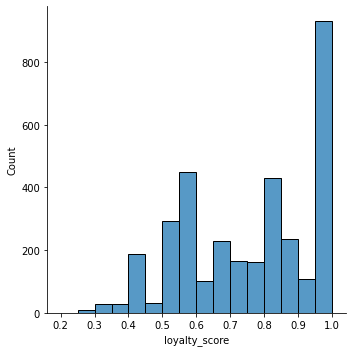

In [39]:
ax = sns.displot(loyalty_df.loyalty_score, kde = False)

In [40]:
loyalty_df.loyalty_score.median()

0.8

In [50]:
brands_loyalty = loyalty_df.groupby('lovely_brand', as_index = False) \
    .agg({'loyalty_score' : 'median', 'user_id' : 'count'})

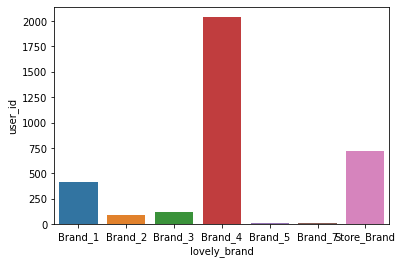

In [52]:
ax = sns.barplot (x = "lovely_brand", y = "user_id", data = brands_loyalty)